In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime as dt
import dateutil

In [2]:
from sklearn import preprocessing
# Converting categorical data to numeric form
le = preprocessing.LabelEncoder()

In [3]:
tomato_data = pd.read_csv("../data/monthly_tomato.csv",
                          names= ['Date','Market Area','Tonnes','Minimum Price(Rs./Quintal)','Maximum Price(Rs./Quintal)'
                                  ,'Modal Price(Rs./Quintal)','Max_avg','Min_avg'],
                          skiprows = 1,
                          sep = ',', engine = 'python'
                       )

In [4]:
ml_tomato_data = tomato_data
tomato_data.head()

,Date,Market Area,Tonnes,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal),Max_avg,Min_avg
0,December,0,2.000000,500.0000,500.000000,500.000000,1375.000000,1375.000000
1,February,0,7.000000,1000.0000,1000.000000,1000.000000,1375.000000,1375.000000
2,July,0,4.666667,1000.0000,1000.000000,1000.000000,1375.000000,1375.000000
3,June,0,1.000000,3000.0000,3000.000000,3000.000000,1375.000000,1375.000000
4,April,1,15.354167,526.3125,982.416667,810.479167,1191.507048,580.853573


In [5]:
ml_tomato_data['Date'] = le.fit_transform(tomato_data['Date'].astype(str))
ml_tomato_data.head()

,Date,Market Area,Tonnes,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal),Max_avg,Min_avg
0,2,0,2.000000,500.0000,500.000000,500.000000,1375.000000,1375.000000
1,3,0,7.000000,1000.0000,1000.000000,1000.000000,1375.000000,1375.000000
2,5,0,4.666667,1000.0000,1000.000000,1000.000000,1375.000000,1375.000000
3,6,0,1.000000,3000.0000,3000.000000,3000.000000,1375.000000,1375.000000
4,0,1,15.354167,526.3125,982.416667,810.479167,1191.507048,580.853573


In [6]:
months = np.array(ml_tomato_data['Date'])
np.unique(months)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [7]:
list(le.classes_)

['April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

X = ml_tomato_data.drop(['Modal Price(Rs./Quintal)','Minimum Price(Rs./Quintal)','Maximum Price(Rs./Quintal)' ], axis=1)

y = ml_tomato_data['Modal Price(Rs./Quintal)']
params = {'n_estimators':1000, 'max_depth': 5, 'min_samples_split':10
          , 'learning_rate': 0.05, 'loss': 'absolute_error'}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
X_train.head()

,Date,Market Area,Tonnes,Max_avg,Min_avg
281,10,30,253.301887,1703.376600,1379.153607
274,3,30,290.448276,1703.376600,1379.153607
175,6,17,4.166667,1282.650171,1043.494398
295,0,32,7.655738,1759.482255,1421.193658
146,6,13,41.200000,926.847724,757.938722


In [10]:
from sklearn.model_selection import GridSearchCV

num_estimators = [500,600, 1000,700,800]
learn_rates = [0.01, 0.02, 0.05, 0.008, 0.007]
max_depths = [4,6,3,5,2]
param_grid = {'n_estimators': num_estimators, 'learning_rate': learn_rates, 'max_depth': max_depths}

grid_search = GridSearchCV(GradientBoostingRegressor(min_samples_split=2, loss='squared_error'), param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

#grid_search.best_params_ #{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 700}

,estimator,GradientBoostingRegressor()
,param_grid,"{'learning_rate': [0.01, 0.02, ...], 'max_depth': [4, 6, ...], 'n_estimators': [500, 600, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,loss,'squared_error'


--------------------------------------------------------------------------------------

In [11]:
params = {'n_estimators':700, 'max_depth':3, 'min_samples_split':2
          , 'learning_rate': 0.008, 'loss': 'squared_error'}
# no. of estimators = no. of boosting stages to use in our model, max_depth of every regression tree(very high tends to overfit
# min_samples_split specifies the min mo. of sample before a node can split, here atleast 2 samples is required to split 
# existing node, loss calulation uses least squares regression)
monthly_gbr_model = GradientBoostingRegressor(**params)
monthly_gbr_model.fit(X_train, y_train) #700, 3, 2, 0.008

,loss,'squared_error'
,learning_rate,0.008
,n_estimators,700
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [12]:
monthly_gbr_model.score(X_train, y_train) #0.7195544422323222

0.8371931367310488

In [13]:
monthly_gbr_model.score(X_test, y_test) #0.5783383813660647

0.6523503979699221

In [14]:
X_train.head()

,Date,Market Area,Tonnes,Max_avg,Min_avg
281,10,30,253.301887,1703.376600,1379.153607
274,3,30,290.448276,1703.376600,1379.153607
175,6,17,4.166667,1282.650171,1043.494398
295,0,32,7.655738,1759.482255,1421.193658
146,6,13,41.200000,926.847724,757.938722


In [15]:
ml_tomato_data.tail()

,Date,Market Area,Tonnes,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal),Max_avg,Min_avg
355,7,39,6.272727,968.181818,1204.545455,1086.363636,1810.361953,1553.000842
356,8,39,6.125000,1912.500000,2162.500000,2037.500000,1810.361953,1553.000842
357,9,39,6.000000,1510.000000,1790.000000,1650.000000,1810.361953,1553.000842
358,10,39,6.166667,983.333333,1250.000000,1116.666667,1810.361953,1553.000842
359,11,39,6.222222,977.777778,1322.222222,1200.000000,1810.361953,1553.000842


In [16]:
array = np.array([7,39,6.272,1810.36,1553])
type(array)
new_array = array.reshape(1,-1)
new_array

array([[   7.   ,   39.   ,    6.272, 1810.36 , 1553.   ]])

In [17]:
monthly_gbr_model.predict(new_array)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1475.24444137])

# Pickling model

In [18]:
import pickle

with open('../models/monthly_gbr_model3.pkl', 'wb') as fid:
    pickle.dump(monthly_gbr_model, fid,2)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


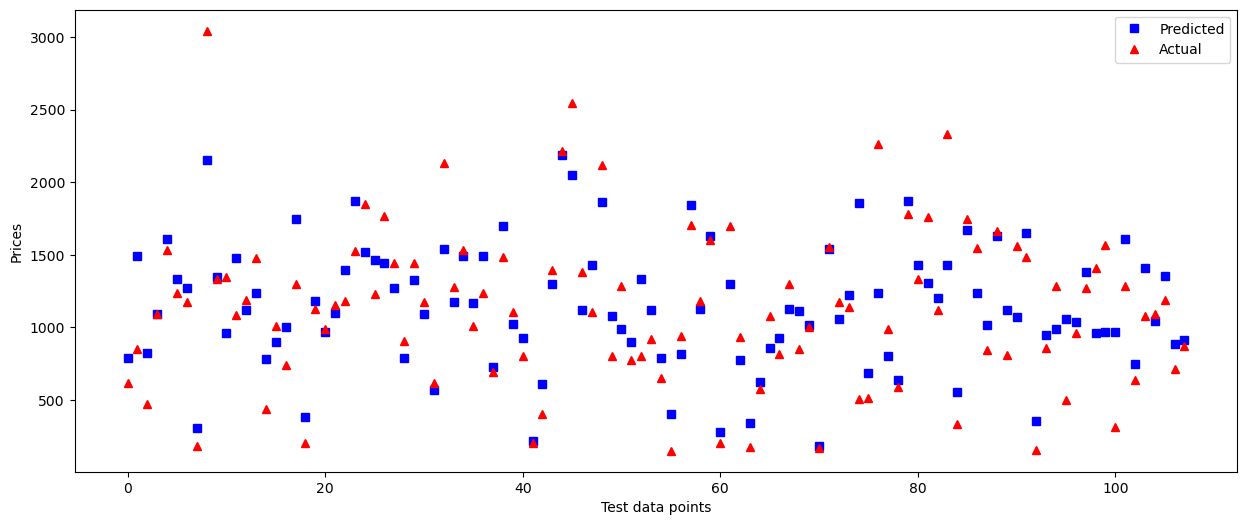

In [20]:
y_predict = monthly_gbr_model.predict(X_test)

%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(y_predict, 'bs', label='Predicted')
plt.plot(y_test.values, 'r^', label='Actual')
plt.ylabel('Prices')
plt.xlabel('Test data points')
plt.legend()
plt.show()

In [21]:
r_square = monthly_gbr_model.score(X_test, y_test)
r_square

0.6523503979699221

In [22]:
from sklearn.metrics import mean_squared_error

monthly_gbr_model_mse = mean_squared_error(y_predict, y_test)
monthly_gbr_model_mse

102241.88721784606

In [23]:
import math
math.sqrt(monthly_gbr_model_mse)

319.7528533380837

our model has an accuracy of 65% . The predicted prices are within +- 319 to actual prices

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


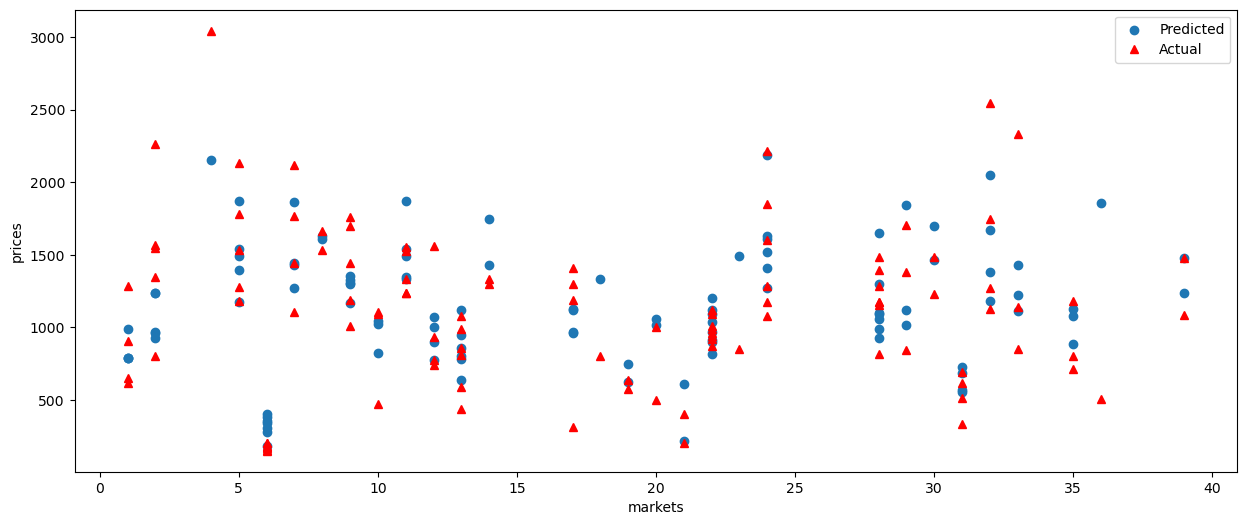

In [24]:
y_predict = monthly_gbr_model.predict(X_test)

%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)
plt.scatter(X_test["Market Area"],y_predict, label='Predicted')
plt.plot(X_test["Market Area"],y_test.values, 'r^',label='Actual')
plt.ylabel('prices')
plt.xlabel('markets')
plt.legend()
plt.show()